In [1]:
from skimage import io
import matplotlib.pyplot as plt
import numpy as np

In [6]:
from scipy.ndimage import correlate
input_img = np.arange(25).reshape(5, 5)
print(input_img)
weights = [[0, 1, 0],
		   [1, 2, 1],
		   [0, 1, 0]]
res_img = correlate(input_img, weights)
print(res_img)
print(res_img[3,3])

[[ 0  1  2  3  4]
 [ 5  6  7  8  9]
 [10 11 12 13 14]
 [15 16 17 18 19]
 [20 21 22 23 24]]
[[  6  11  17  23  28]
 [ 31  36  42  48  53]
 [ 61  66  72  78  83]
 [ 91  96 102 108 113]
 [116 121 127 133 138]]
108


In [5]:
print(correlate(input_img, weights, mode="constant", cval=10))
print(correlate(input_img, weights, mode="reflect", cval=10))

[[ 26  20  25  30  40]
 [ 36  36  42  48  54]
 [ 61  66  72  78  79]
 [ 86  96 102 108 104]
 [ 96 110 115 120 110]]
[[  6  11  17  23  28]
 [ 31  36  42  48  53]
 [ 61  66  72  78  83]
 [ 91  96 102 108 113]
 [116 121 127 133 138]]


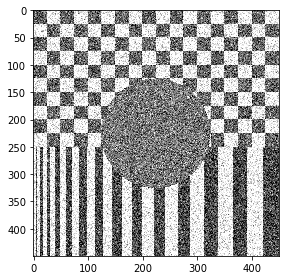

In [17]:
im_org = io.imread('data/Gaussian.png')
io.imshow(im_org)
io.show()

In [20]:
def apply_mean_filter(img, size):
    weights = np.ones([size,size])
    weights = weights / np.sum(weights)
    out_img = correlate(img,weights)
    return out_img
gauss5 = apply_mean_filter(im_org,5)
gauss10 = apply_mean_filter(im_org,10)
gauss20 = apply_mean_filter(im_org,20)
gauss40 = apply_mean_filter(im_org,40)

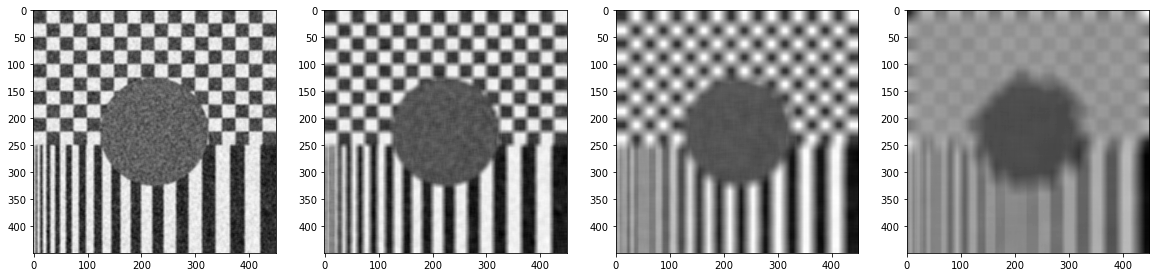

In [21]:
fig, ax = plt.subplots(nrows = 1, ncols = 4, figsize = (20, 5))
ax[0].imshow(gauss5, cmap = 'gray')
ax[1].imshow(gauss10, cmap = 'gray')
ax[2].imshow(gauss20, cmap = 'gray')
ax[3].imshow(gauss40, cmap = 'gray')
plt.show()

In [31]:
from skimage.filters import median
def apply_median_filter(img,size):
    footprint = np.ones([size,size])
    med_img = median(img, footprint)
    return med_img
median5 = apply_median_filter(im_org,5)
median10 = apply_median_filter(im_org,10)
median20 = apply_median_filter(im_org,20)
median40 = apply_median_filter(im_org,40)

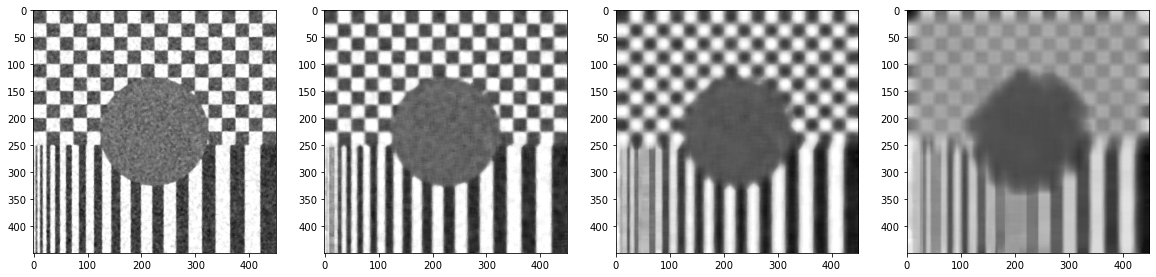

In [32]:
fig, ax = plt.subplots(nrows = 1, ncols = 4, figsize = (20, 5))
ax[0].imshow(median5, cmap = 'gray')
ax[1].imshow(median10, cmap = 'gray')
ax[2].imshow(median20, cmap = 'gray')
ax[3].imshow(median40, cmap = 'gray')
plt.show()

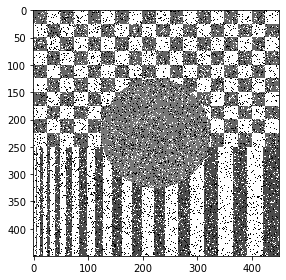

In [33]:
sp = io.imread('data/SaltPepper.png')
io.imshow(sp)
io.show()

In [34]:
mean5 = apply_mean_filter(sp, 5)
median5 = apply_median_filter(sp,5)
mean20 = apply_mean_filter(sp,20)
med20 = apply_median_filter(sp,20)

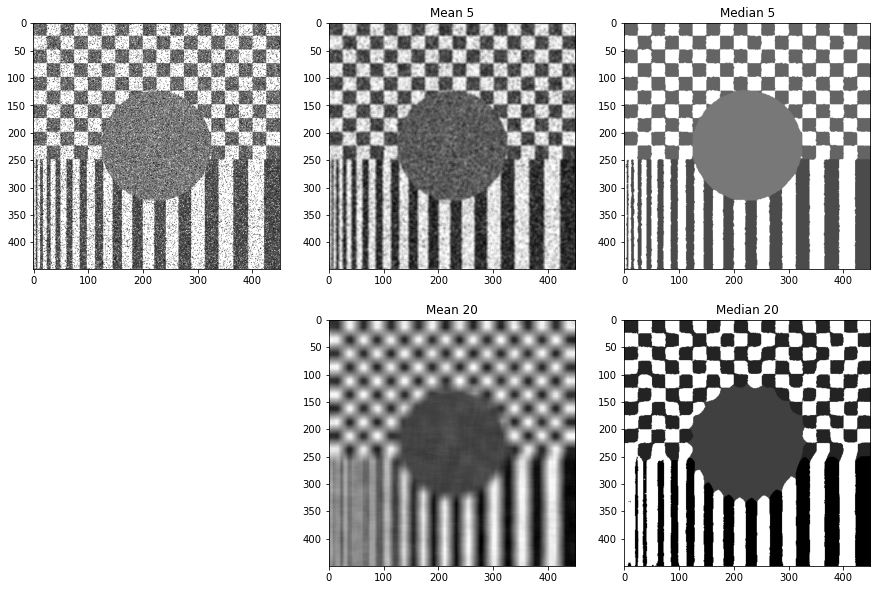

In [35]:
fig, ax = plt.subplots(nrows = 2, ncols = 3, figsize = (15, 10))
ax[0,0].imshow(sp, cmap = 'gray')
ax[0,1].imshow(mean5, cmap = 'gray')
ax[0,1].set_title('Mean 5')
ax[0,2].imshow(median5, cmap = 'gray')
ax[0,2].set_title('Median 5')
ax[1,0].set_axis_off()
ax[1,1].imshow(mean20, cmap = 'gray')
ax[1,1].set_title('Mean 20')
ax[1,2].imshow(med20, cmap = 'gray')
ax[1, 2].set_title('Median 20')
plt.show()

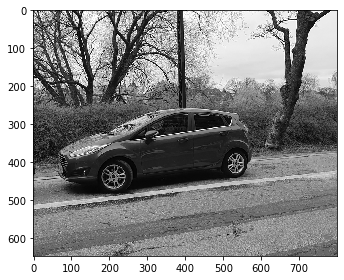

In [40]:
from skimage.filters import gaussian
from skimage import color
imgcar = io.imread('data/car.png')
gray = color.rgb2gray(imgcar)
io.imshow(gray)
io.show()

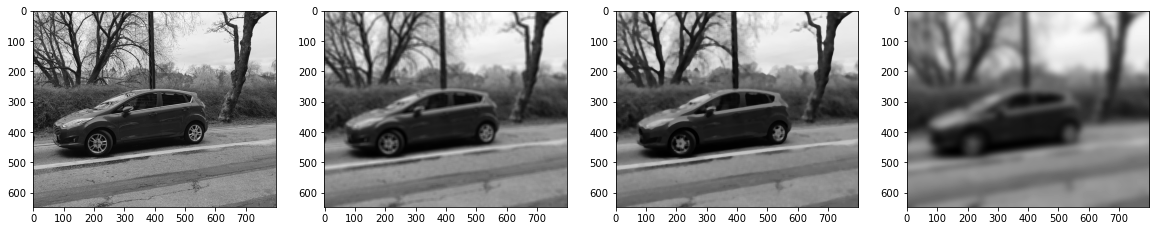

In [43]:
def apply_gauss_filter(img,size):
    gauss_img = gaussian(img,size)
    return gauss_img
car_mean = apply_mean_filter(gray,10)
car_median = apply_median_filter(gray,10)
car_gauss = apply_gauss_filter(gray,10)

fig, ax = plt.subplots(nrows = 1, ncols = 4, figsize = (20, 5))
ax[0].imshow(gray, cmap = 'gray')
ax[1].imshow(car_mean, cmap = 'gray')
ax[2].imshow(car_median, cmap = 'gray')
ax[3].imshow(car_gauss, cmap = 'gray')
plt.show()

In [57]:
from skimage.filters import prewitt_h
from skimage.filters import prewitt_v
from skimage.filters import prewitt

donald = io.imread('data/donald_1.png')
graydonald = color.rgb2gray(donald)
img_h = prewitt_h(graydonald)
img_v = prewitt_v(graydonald)

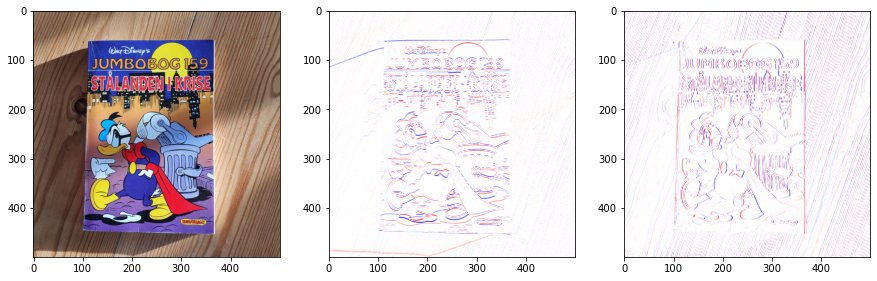

In [47]:
fig, ax = plt.subplots(nrows = 1, ncols = 3, figsize = (15, 5))
ax[0].imshow(donald)
ax[1].imshow(img_h, cmap = 'bwr', vmin = -1, vmax = 1)

im = ax[2].imshow(img_v, cmap = 'bwr', vmin = -1, vmax = 1)

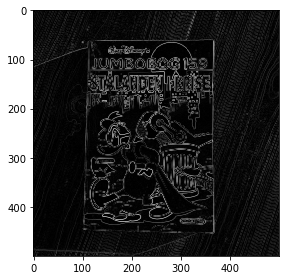

In [65]:
io.imshow(prewitt(graydonald))
io.show()

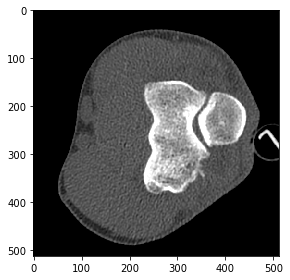

In [66]:
img_org = io.imread('data/ElbowCTSlice.png')
io.imshow(img_org)
io.show()

In [67]:
from skimage.filters import threshold_otsu

def edge_detection(img, filter_type, kernel_size, plot = False):
    if filter_type == 'gaussian':
        img_filt = gaussian(img,kernel_size)
    elif filter_type == 'median':
        img_filt = apply_median_filter(img,kernel_size)
    gradients = prewitt(img_filt)
    thres = threshold_otsu(gradients)
    edges = gradients > thres

    if plot:
        fig, ax = plt.subplots(nrows = 1, ncols = 3, figsize = (10,5))
        ax[0].imshow(img_filt, cmap = 'gray')
        ax[1].imshow(gradients, cmap = 'gray')
        ax[2].imshow(edges, cmap = 'gray')
        [ax_.set_axis_off() for ax_ in ax]
        plt.show()

    return edges
    

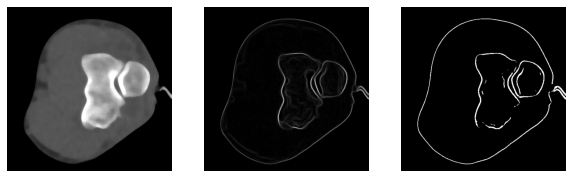

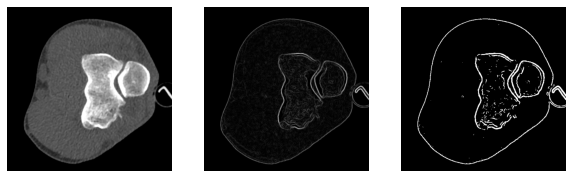

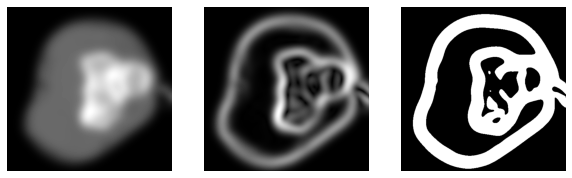

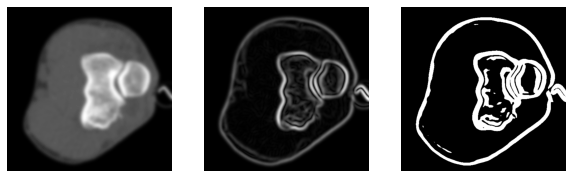

In [69]:
edges = edge_detection(img_org, 'median', 15, True)
edges = edge_detection(img_org, 'median', 5, True)
edges = edge_detection(img_org, 'gaussian', 15, True)
edges = edge_detection(img_org, 'gaussian', 5, True)